<br><font face="Times New Roman" size=5><div dir=ltr align=center>
<font color=blue size=8>
    Introduction to Machine Learning <br>
<font color=red size=5>
    Sharif University of Technology - Computer Engineering Department <br>
    Fall 2022<br> <br>
<font color=black size=6>
    Homework 2: Practical - SVM
    <br>
<font color=black size=4>
    Alireza Gargoori Motlagh, Alireza Heidari
    
<br><br>
<font size=4>
   **Name**: Mahdi Shafiei<br>
   **Student ID**: 99109409<br> <br>
In this homework, we are going to implement the algorithms from the second and third chapters of the course, so reading the notebooks of these chapters would be quite useful. Also, we are going to evaulate and compare our models by the metrics defined in chapter 3. Keep in mind to complete all of the following questions and write your own codes in the TODO parts.

## <font face="Times New Roman" size=4><div dir=ltr>
## Problem 3: Face Classification by SVM on Eigenfaces (150 points)
In the following problem, we are going to build a classifier to distinguish the faces of 40 people on a toy dataset. The dataset includes 400 pictures of 40 people faces, each by a 64*64 pixel picture. Use the following cell to download the dataset:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn import decomposition

faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
print(faces.images[0].shape)

(400, 4096)
(64, 64)


<font face="Times New Roman" size=4><div dir=ltr>
### Visualization of the Faces (5 points)
Plot an image of each class in one figure using subplots. (Note that the design matrix X is availabe in <code>faces.data</code> and the target values available in <code>faces.target</code> .)

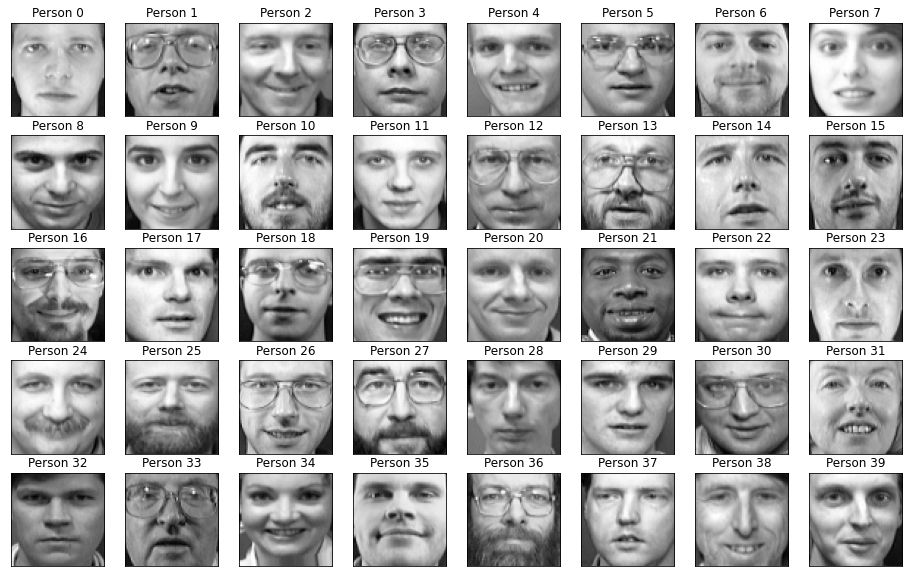

In [3]:
#TODO
people = set(faces.target)
col = 8
row = ceil(len(people) / col)
fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(16, 10))

for person in people:
    person_indexes = faces.target == person
    image = faces.images[person_indexes][0]
    axes[person // col][person % col].imshow(image, cmap='gray')
    axes[person // col][person % col].set_title("Person " + str(person))
    
    
plt.setp(axes, xticks=[], yticks=[])
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Train-Test Split (2 points)
Split the data into train and test sets and print the dimensions of each set. (70% for train and 30% for test)

In [4]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(280, 4096) (120, 4096)


<font face="Times New Roman" size=4><div dir=ltr>
### Dimensionality Reduction (18 points)
As you might have guessed, the number of featuers, i.e. pixels, is quite large and training a classifier might take a considerbale time. However, using a wise method to reduce the dimension of our data could decrease the cost of training the model. In the following cell use PCA (Principal Component Analysis) to reduce the dimension of the dataset. Choose an appropirate number of components in your PCA and explain your reason for your choice.

In [5]:
#TODO
pca = decomposition.PCA(n_components=50, whiten=True)
pca.fit(X_train)

PCA(n_components=50, whiten=True)

<font face="Times New Roman" size=4><div dir=ltr>
Plot the scree plot of the proportion of the variance explained(PVE) vs principal components to determine the number of principal components for futher analysis.

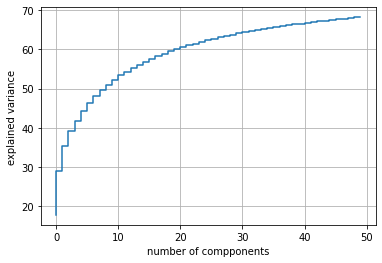

In [6]:
#TODO
exp_var = pca.explained_variance_
cum_sum_eig = np.cumsum(exp_var)
plt.grid()
plt.step(range(len(cum_sum_eig)), cum_sum_eig)
plt.xlabel("number of compponents")
plt.ylabel("explained variance")
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Eigenfaces: Principal Components Visualization (25 points)
Plot the mean face using your PCA model with <code>pca.mean_</code> attribute followed by a reshape to original dimensions. What is this mean vector?

This vector is the average of all faces, which means the intensity of the $i$th pixel is the average of that pixel over all faces. The result, as we would expect, is a featureless face.

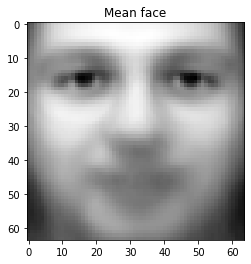

In [7]:
#TODO
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap='gray')
plt.title("Mean face")
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Eigenfaces is the name given to a set of eigenvectors when used in the computer vision problem of human face recognition. Plot the 30 first eigenfaces sorted by their rank from the most important to the lowest. Can you explain what these faces indicate?

Each face, is in fact one of the eigenvalues of X_data covariance matrix that is reshaped from a 1*4096 vector to a 64*64 matrix so that it could be displayed.

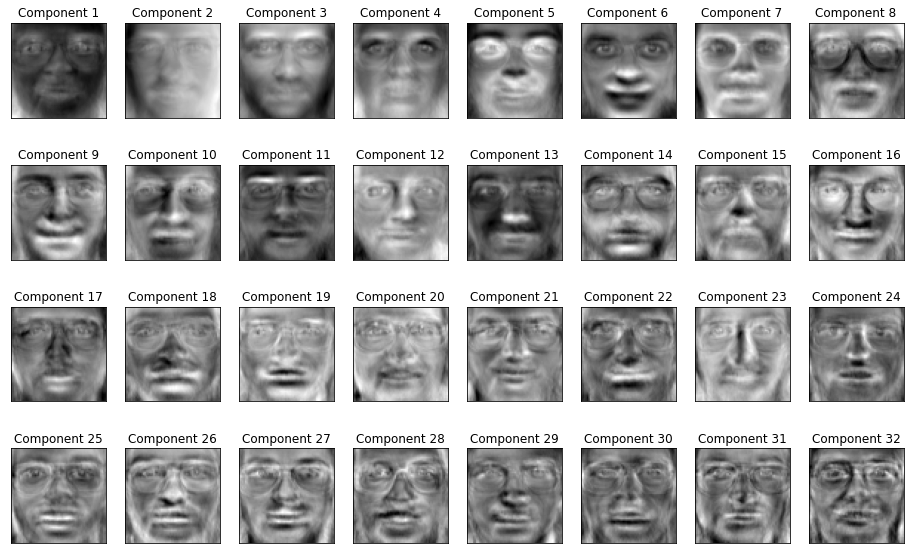

In [8]:
#TODO
col = 8
row = ceil(30 / col)
fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(16, 10))

for i in range(32):
    person_indexes = faces.target == person
    image = pca.components_[i].reshape(faces.images[0].shape)
    axes[i // col][i % col].imshow(image, 'gray')
    axes[i // col][i % col].set_title("Component " + str(i + 1))
    
    
plt.setp(axes, xticks=[], yticks=[])
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
Transform your train and test sets to the new feature space using your PCA module. 

In [9]:
#TODO
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape)
print(X_train_pca.shape)

(280, 4096)
(280, 50)


<font face="Times New Roman" size=4><div dir=ltr>
### Training your SVM Classifier (50 points)
Train an SVM classifier on the transformed dataset in the new feature space. You should use Grid Search Cross Validation or other validation techniques to obtain the best hyperparameters for your classifier. 

In [10]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#TODO
"""
clf = svm.SVC(kernel='', C=?, degree=?, gamma=?)
clf.fit(X_train, y_train)

"""
param_grid = {'C': [5, 1, 0.1],
           'gamma': [0.0001, 0.0003, 0.0008, 0.0009, 0.001, 0.0011, 0.0018, 0.002],
             'kernel' : ['linear', 'rbf', 'sigmoid']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_pca, y_train)

clf = grid.best_estimator_
clf.fit(X_train_pca, y_train)

print()
print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END ..C=5, gamma=0.0001, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END ..C=5, gamma=0.0001, kernel=linear;, score=0.929 total time=   0.0s
[CV 3/5] END ..C=5, gamma=0.0001, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END ..C=5, gamma=0.0001, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END ..C=5, gamma=0.0001, kernel=linear;, score=0.911 total time=   0.0s
[CV 1/5] END .....C=5, gamma=0.0001, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/5] END .....C=5, gamma=0.0001, kernel=rbf;, score=0.107 total time=   0.0s
[CV 3/5] END .....C=5, gamma=0.0001, kernel=rbf;, score=0.089 total time=   0.0s
[CV 4/5] END .....C=5, gamma=0.0001, kernel=rbf;, score=0.089 total time=   0.0s
[CV 5/5] END .....C=5, gamma=0.0001, kernel=rbf;, score=0.071 total time=   0.0s
[CV 1/5] END .C=5, gamma=0.0001, kernel=sigmoid;, score=0.107 total time=   0.0s
[CV 2/5] END .C=5, gamma=0.0001, kernel=sigmoid

c:\Users\SALAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END .C=5, gamma=0.0001, kernel=sigmoid;, score=0.089 total time=   0.0s
[CV 4/5] END .C=5, gamma=0.0001, kernel=sigmoid;, score=0.089 total time=   0.0s
[CV 5/5] END .C=5, gamma=0.0001, kernel=sigmoid;, score=0.071 total time=   0.0s
[CV 1/5] END ..C=5, gamma=0.0003, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END ..C=5, gamma=0.0003, kernel=linear;, score=0.929 total time=   0.0s
[CV 3/5] END ..C=5, gamma=0.0003, kernel=linear;, score=0.929 total time=   0.0s
[CV 4/5] END ..C=5, gamma=0.0003, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END ..C=5, gamma=0.0003, kernel=linear;, score=0.911 total time=   0.0s
[CV 1/5] END .....C=5, gamma=0.0003, kernel=rbf;, score=0.107 total time=   0.0s
[CV 2/5] END .....C=5, gamma=0.0003, kernel=rbf;, score=0.107 total time=   0.0s
[CV 3/5] END .....C=5, gamma=0.0003, kernel=rbf;, score=0.089 total time=   0.0s
[CV 4/5] END .....C=5, gamma=0.0003, kernel=rbf;, score=0.089 total time=   0.0s
[CV 5/5] END .....C=5, gamma

<font face="Times New Roman" size=4><div dir=ltr>
After training your model, we can check its prediction on test samples. Run the following cell to check your model predictions with the target values on test samples. Predictions with red label indicate false classification of your model.

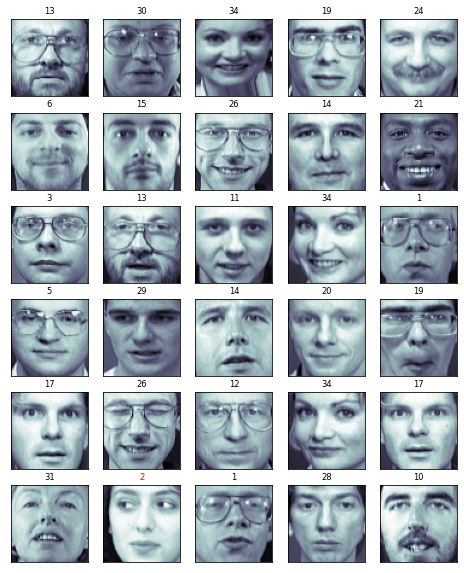

In [11]:
fig = plt.figure(figsize=(8, 10))
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0] #X_test_new is the transformed X_test after PCA.
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

<font face="Times New Roman" size=4><div dir=ltr>
## Performance Measures
Let's evaluate your classifier to find out how good your model is.
    
    
### Precision Recall Tradeoff (20 points)
Plot the precision and recall versus the decision threshold figure and precision vs recall figure.

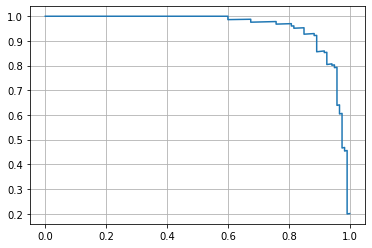

optimum precision: 0.8916666666666667
optimum recall:    0.8916666666666667


In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#TODO

y_train_bin = label_binarize(y_train, classes=range(40))
y_test_bin = label_binarize(y_test, classes=range(40))

binary_svm = OneVsRestClassifier(clf)
binary_svm.fit(X_train_pca, y_train_bin)
y_score = binary_svm.decision_function(X_test_pca)

precision = []
recall = []
threshold = []

# A "micro-average": quantifying score on all classes jointly
precision, recall, threshold = precision_recall_curve(
    y_test_bin.ravel(), y_score.ravel()
)

plt.plot(recall, precision)
plt.grid()
plt.show()

optimum_precision = 0
optimum_recall = 0

for i in range(len(recall)):
    if abs(recall[i] - precision[i]) <= 0.001:
        optimum_precision, optimu_recall = precision[i], recall[i]
        
print("optimum precision:", optimum_precision)
print("optimum recall:   ", optimu_recall)

<font face="Times New Roman" size=4><div dir=ltr>
Then find the decision threshold, where the recall is equal to the precision. Write down it in the below cell:
    <br>
note: it should be apparent in the above figures.

decision_threshold = because this problem is a multi-class problem, we can't assign one sigle best decision threshold.

recall at the above threshold = 0.9

<font face="Times New Roman" size=4><div dir=ltr>
### ROC/AUC (10 points)
Train a RandomForestClassifier with 30 estimators then plot a ROC curve, and calculate AUC for both randomForsetClassifier and your SVM classifier that you trained earlier, which one is the best by considering AUC indicator?


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#TODO: Train the random forest on the data
random_forest = RandomForestClassifier(max_depth=50, random_state=0)
random_forest.fit(X_train_pca, y_train)
random_forest_predictions = random_forest.predict(X_test_pca)
print("Random Forest Classifier report:")
print(classification_report(y_test, random_forest_predictions))

Random Forest Classifier report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       1.00      0.33      0.50         3
           3       0.50      1.00      0.67         1
           4       0.33      0.50      0.40         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       0.75      1.00      0.86         3
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      0.60      0.75         5
          17       0.80      0.67      0.73     

In [28]:
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 0))])
model = pipe_rf.fit(X_train_pca, y_train)
y_score = model.predict_proba(X_test_pca)

y_test_bin = label_binarize(y_test, classes=range(40))
n_classes = y_test_bin.shape[1]

print(y_test_bin.shape)
print(y_score.shape)

(120, 40)
(120, 40)


c:\Users\SALAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\SALAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


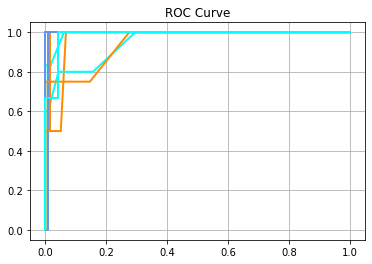

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
#TODO: plot roc_curve and print roc_auc_score for svm and random forest classifiers

fpr = dict()
tpr = dict()
roc_auc = dict()

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2)

plt.title("ROC Curve")
plt.grid()
plt.show()

<font face="Times New Roman" size=4><div dir=ltr>
### Classification Report (5 points)
Use the <code>classification_report</code> to describe the performance of your SVM model with different metrics. Explain your results and compare the predictions of model on different classes in few sentences.

In [16]:
from sklearn.metrics import classification_report

#TODO
model = clf
model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         6
          19       1.00    

<font face="Times New Roman" size=4><div dir=ltr>
### Confusion Matrix (15 points)
Plot the confusion matrix of the classifier's predictions.
Let’s focus on the errors of the plot. Divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors, then plot the result.

In [17]:
# TODO: calculate conf_mx then print it
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test_pca)
conf_mx = confusion_matrix(y_test, predictions)

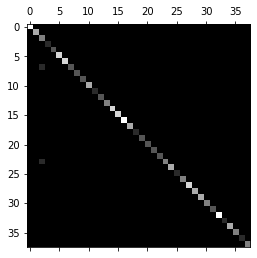

In [18]:
# TODO: after calculating confusion matrix, visualize it using below code

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [19]:
# TODO: calculate norm_conf_mx then print it
import sklearn
norm_conf_mx = sklearn.preprocessing.normalize(conf_mx)

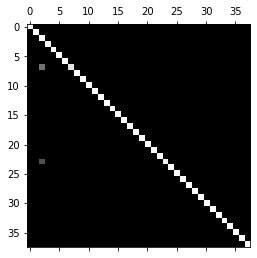

In [20]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()